In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv("data/housing-data.csv")
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


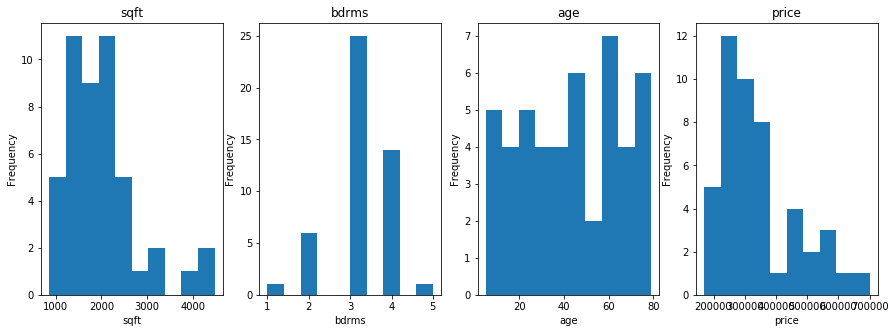

In [69]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i + 1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [70]:
df['sqft1000'] = df['sqft'] / 1000.0
df['age10'] = df['age'] / 10.0
df['price100k'] = df['price'] / 1e5

X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [101]:
from keras.models import Sequential
from keras.layers import Dense

In [102]:
model = Sequential()
model.add(Dense(1, input_dim=3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.1), 'mean_squared_error')

In [106]:
history = model.fit(x=X_train, y=y_train, epochs=20, verbose=0)

In [100]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import r2_score
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-0.156
The R2 score on the Test set is:	0.567
